# Testing Each of the Tools Built in the Drift Trajectory Model Toolbox

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import pandas as pd

import drift_trajectory_model_toolbox as tools

%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# Get Data to test each function on
bathy_file = '../data/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_dataset = nc.Dataset(bathy_file)

# Create grid from coordinates
xFRF_grid, yFRF_grid = np.meshgrid(bathy_dataset['xFRF'][:],bathy_dataset['yFRF'][:])
bathy = bathy_dataset['elevation'][0,:,:]
x_values = bathy_dataset['xFRF'][:]
bathy_profile = np.nanmean(bathy, axis=0)

# Load the mission conditions dataframe
mission_df = pd.read_csv('../data/mission_df.csv')  

# Get Mission Specific Conditions
# mission_num = 19 # Small Wave Angle
mission_num = 48 # Big Wave Angle
wind_speed = mission_df[mission_df['mission number'] == mission_num]['wind speed [m/s]'].values[0]
wind_dir_FRF_mathconv = mission_df[mission_df['mission number'] == mission_num]['wind direction FRF math convention [deg]'].values[0]
stokes_drift = mission_df[mission_df['mission number'] == mission_num]['stokes drift [m/s] (8marray)'].values[0]
wave_dir_FRF_mathconv = mission_df[mission_df['mission number'] == mission_num]['Mean Dir FRF Math conv (8marray)'].values[0]
Hs = mission_df[mission_df['mission number'] == mission_num]['Hs [m] (8marray)'].values[0]
Tm = mission_df[mission_df['mission number'] == mission_num]['Tm [s] (8marray)'].values[0]
water_level = mission_df[mission_df['mission number'] == mission_num]['water level [m]'].values[0]
surf_zone_edge = mission_df[mission_df['mission number'] == mission_num]['surf zone edge [m]'].values[0]


40.58889846801759


<>:12: SyntaxWarning: invalid escape sequence '\g'
<>:23: SyntaxWarning: invalid escape sequence '\g'
<>:12: SyntaxWarning: invalid escape sequence '\g'
<>:23: SyntaxWarning: invalid escape sequence '\g'
/var/folders/v_/wf8btpmn6s588vb9xbxbr9bw0000gp/T/ipykernel_62661/2084133820.py:12: SyntaxWarning: invalid escape sequence '\g'
  ax1.axvline(x_br, color='k', linestyle='dashed', label=f'Saturated Surf Zone at $\gamma = 0.35$, alpha={np.round(alpha, 3)}')
/var/folders/v_/wf8btpmn6s588vb9xbxbr9bw0000gp/T/ipykernel_62661/2084133820.py:23: SyntaxWarning: invalid escape sequence '\g'
  ax3.axvline(x_br, color='k', linestyle='dashed', label='Saturated Surf Zone at $\gamma = 0.35$')
/Users/ejrainville/projects/surfing-transport/analysis/drift_trajectory_model_toolbox.py:62: RuntimeWarning: invalid value encountered in arcsin
  theta = np.rad2deg(np.arcsin(c * np.sin(np.deg2rad(theta_0)) / c_0))
/var/folders/v_/wf8btpmn6s588vb9xbxbr9bw0000gp/T/ipykernel_62661/2084133820.py:10: RuntimeWarning: 

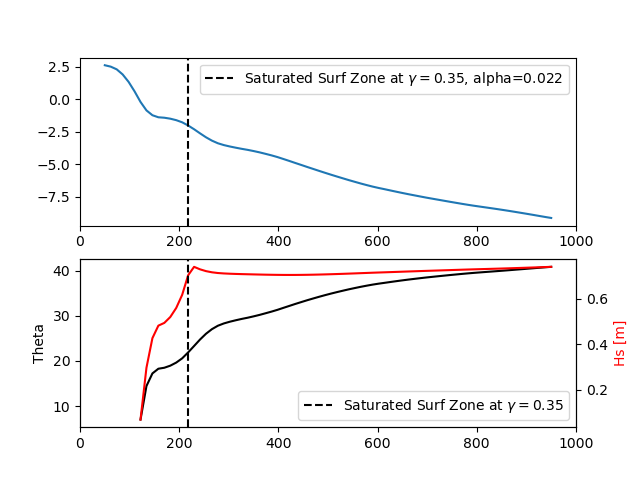

In [37]:
# Test the shoaling and refraction function 
theta_0 = wave_dir_FRF_mathconv - 180
# theta_0 = wave_dir_FRF_mathconv 
x_0 = 914 # xFRF location of 8 m array
print(theta_0)
gamma = 0.35
theta, Hs_profile, H_br, theta_br, x_br, alpha = tools.ray_tracing_and_shoaling(9.8, gamma, Tm, Hs, theta_0, x_0, x_values, -bathy_profile)

# plot the refraction and shoaling
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(x_values, bathy_profile)
ax1.axvline(x_br, color='k', linestyle='dashed', label=f'Saturated Surf Zone at $\gamma = 0.35$, alpha={np.round(alpha, 3)}')
ax1.legend()
ax1.set_xlim(0, 1000)


ax2.plot(x_values, theta, color='k')
ax2.set_ylabel('Theta', color='k')
ax2.set_xlim(0, 1000)
ax3 = ax2.twinx()
ax3.plot(x_values, Hs_profile, color='r')
ax3.set_ylabel('Hs [m]', color='r')
ax3.axvline(x_br, color='k', linestyle='dashed', label='Saturated Surf Zone at $\gamma = 0.35$')
ax3.legend()

Text(0, 0.5, 'Stokes Drift Magnitude [m/s]')

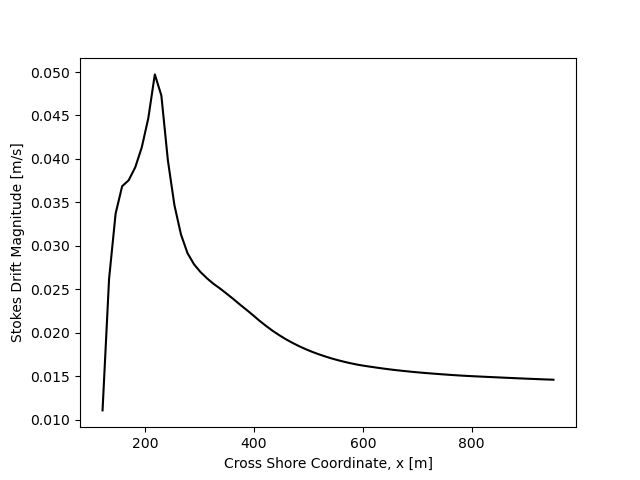

In [38]:
# Test The Stokes Drift profile
gamma = 0.35
u_s = tools.stokes_drift_profile(Hs_profile, Tm, -bathy_profile)

fig, ax = plt.subplots()
ax.plot(x_values, u_s, color='k')
ax.set_xlabel('Cross Shore Coordinate, x [m]')
ax.set_ylabel('Stokes Drift Magnitude [m/s]')

Text(0, 0.5, 'Fraction of Breaking [-]')

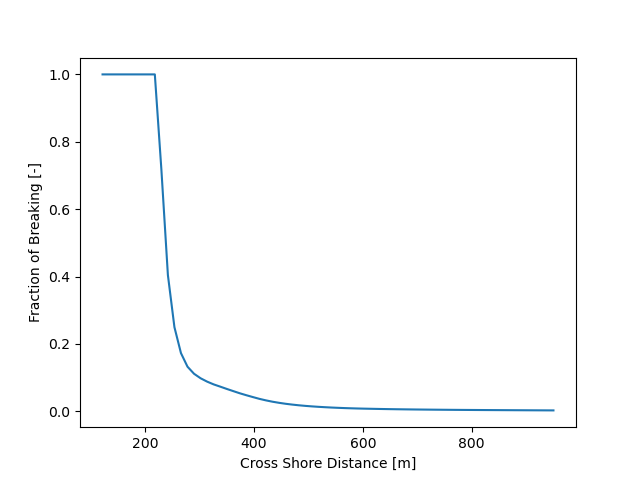

In [39]:
# Compute the Fraction of Breaking
qb_profile = tools.compute_fraction_of_breaking_profiles(gamma, Hs_profile, -bathy_profile)

# Plot the fraction of breaking profile
fig, ax = plt.subplots()
ax.plot(x_values, qb_profile)
ax.set_xlabel('Cross Shore Distance [m]')
ax.set_ylabel('Fraction of Breaking [-]')


<>:15: SyntaxWarning: invalid escape sequence '\g'
<>:30: SyntaxWarning: invalid escape sequence '\g'
<>:36: SyntaxWarning: invalid escape sequence '\g'
<>:15: SyntaxWarning: invalid escape sequence '\g'
<>:30: SyntaxWarning: invalid escape sequence '\g'
<>:36: SyntaxWarning: invalid escape sequence '\g'
/var/folders/v_/wf8btpmn6s588vb9xbxbr9bw0000gp/T/ipykernel_62661/2710570196.py:15: SyntaxWarning: invalid escape sequence '\g'
  ax1.axvline(x_br, color='k', linestyle='dashed', label='Saturated Surf Zone at $\gamma = 0.35$')
/var/folders/v_/wf8btpmn6s588vb9xbxbr9bw0000gp/T/ipykernel_62661/2710570196.py:30: SyntaxWarning: invalid escape sequence '\g'
  ax3.axvline(x_br, color='k', linestyle='dashed', label='Saturated Surf Zone at $\gamma = 0.35$')
/var/folders/v_/wf8btpmn6s588vb9xbxbr9bw0000gp/T/ipykernel_62661/2710570196.py:36: SyntaxWarning: invalid escape sequence '\g'
  ax4.axvline(x_br, color='k', linestyle='dashed', label='Saturated Surf Zone at $\gamma = 0.35$')


(0.0, 1000.0)

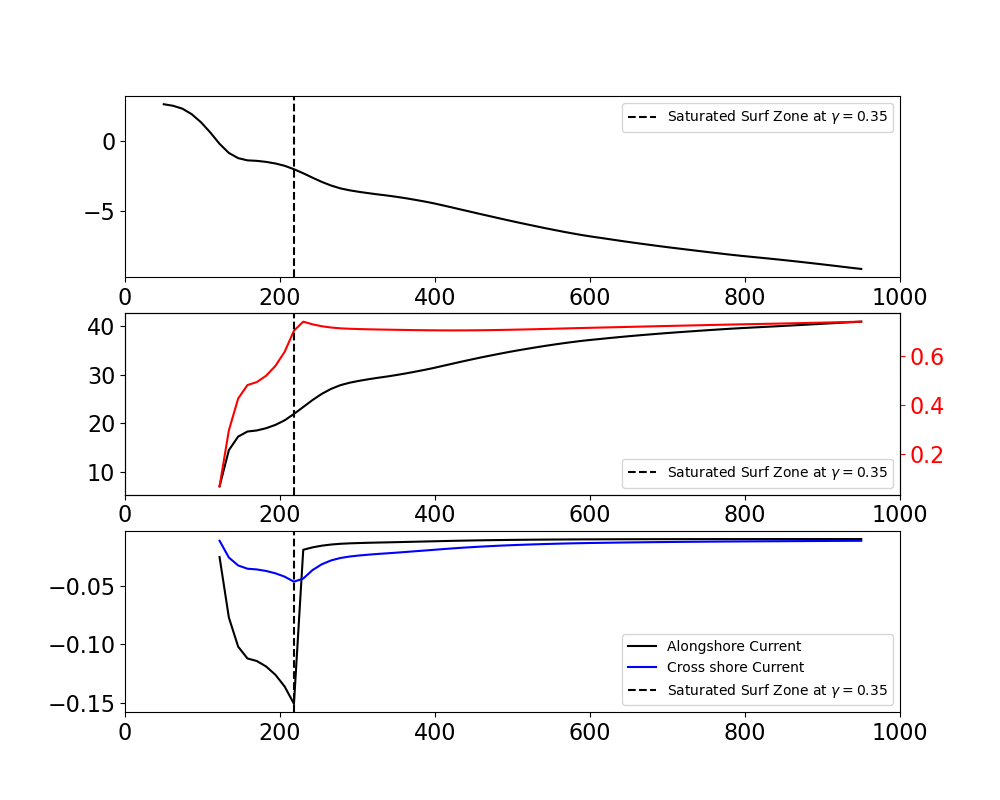

In [40]:
# Test the Along Shore Current Profile Estimate
c_d = 0.0033
# alpha = 0.00936
# alpha = 0.023
along_shore_current = tools.compute_alongshore_current_profile(gamma, Hs_profile, Tm, x_values, x_br, -bathy_profile, 
                                                               theta, c_d, alpha, mission_num)

# Test the combined Along and Cross Shore Current profiles
alongshore, crossshore = tools.create_waves_along_and_crossshore_current_profiles(theta, u_s, along_shore_current)

# Plot the along shore current profile
fig, (ax1, ax2, ax4) = plt.subplots(nrows=3, figsize=(10, 8))

ax1.plot(x_values, bathy_profile, color='k')
ax1.axvline(x_br, color='k', linestyle='dashed', label='Saturated Surf Zone at $\gamma = 0.35$')
ax1.tick_params(axis='both', labelsize=16)
# ax1.set_ylabel('Elevation (relative to NAVD88) [m]')
ax1.legend()
ax1.set_xlim(0, 1000)


ax2.plot(x_values, theta, color='k')
ax2.tick_params(axis='both', labelsize=16)
# ax2.set_ylabel('Wave Angle (Relative to Shore Normal [deg])', color='k')
ax2.set_xlim(0, 1000)
ax3 = ax2.twinx()
ax3.plot(x_values, Hs_profile, color='r')
ax3.tick_params(axis='y', colors='r') 
# ax3.set_ylabel('Hs [m]', color='r')
ax3.axvline(x_br, color='k', linestyle='dashed', label='Saturated Surf Zone at $\gamma = 0.35$')
ax3.tick_params(axis='both', labelsize=16)
ax3.legend()

ax4.plot(x_values, alongshore, label='Alongshore Current', color='k')
ax4.plot(x_values, crossshore, label='Cross shore Current', color='b')
ax4.axvline(x_br, color='k', linestyle='dashed', label='Saturated Surf Zone at $\gamma = 0.35$')
# ax4.set_xlabel('Cross Shore Coordinate, x [m]')
# ax4.set_ylabel('Along Shore Current [m/s]')
ax4.legend()
ax4.tick_params(axis='both', labelsize=16)
ax4.set_xlim(0, 1000)